# Introducción al ensamblado de modelos

In [70]:
# vamos a repasar Programación Orientada a Objetos
# Crear la clase Modelo que se inicializa con se inicializa con un atributo
# Tiene la función es_leche que recibe un parámetro
# Devuelve True si ese parámetro coincide con el atributo inicial
# Devuelve False en caso contrario
# Ejemplo:
# modelo = Modelo("lactosa")
# modelo.es_leche("lactosa") <-- True
# modelo.es_leche("fructosa") <-- False
class Modelo:
    def __init__(self,atr):
        self.atributo = atr
    def es_leche(self,caracteristica):
        return self.atributo == caracteristica

In [71]:
# Todo lo que es blanco, es leche
modelo_1 = Modelo("blanco")
# Todo lo que es líquido, es leche
modelo_2 = Modelo("líquido")
# Todo lo que es de origen animal, es leche
modelo_3 = Modelo("animal")

In [72]:
modelo_1.es_leche("naranja")

False

In [73]:
modelo_1.es_leche("blanco")

True

In [74]:
# predecir para zumo de naranja, azúcar, chorizo y leche
# Lista de atributos: 
# 0: color
# 1: estado
# 2: origen
zumo_naranja = ["naranja", "líquido", "vegetal"]
azucar = ["blanco", "sólido", "vegetal"]
chorizo = ["rojo", "solido", "animal"]
leche = ["blanco", "líquido", "animal"]


In [75]:
# Calcular accuracy y matriz de confusión
print(modelo_1.es_leche(zumo_naranja[0]))
print(modelo_1.es_leche(azucar[0]))
print(modelo_1.es_leche(chorizo[0]))
print(modelo_1.es_leche(leche[0]))
# True POsitive: leche
# True Negativa: zumo naranja y chorizo
# False Positve: azucar
# False Negative: nada

False
True
False
True


In [76]:
# Similar para modelo_2
# Calcular accuracy y matriz de confusión
# Calcular accuracy y matriz de confusión
print(modelo_2.es_leche(zumo_naranja[1]))
print(modelo_2.es_leche(azucar[1]))
print(modelo_2.es_leche(chorizo[1]))
print(modelo_2.es_leche(leche[1]))
# True POsitive: leche
# True Negativa: chorizo y azucar
# False Positve: zumo 
# False Negative: 
3/4

True
False
False
True


0.75

In [77]:
# Similar para modelo_3
# Calcular accuracy y matriz de confusión
print(modelo_3.es_leche(zumo_naranja[2]))
print(modelo_3.es_leche(azucar[2]))
print(modelo_3.es_leche(chorizo[2]))
print(modelo_3.es_leche(leche[2]))
# True POsitive: leche
# True Negativa: zumo y azucar
# False Positve:  chorizo
# False Negative: 
3/4

False
False
True
True


0.75

Los tres modelos son bastante malos... por separado.

¿Qué sucedería si damos un voto a cada modelo y solo si el objeto (zumo, azucar, chorizo, leche) obtiene la mayoría de votos decimos que pertenece a la categoría leche?

In [78]:
# Repetir para azucar, chorizo y leche
votos_zumo = modelo_1.es_leche(zumo_naranja[0]) + modelo_2.es_leche(zumo_naranja[1]) + modelo_3.es_leche(zumo_naranja[2])
votos_zumo

1

In [79]:
votos_azucar = modelo_1.es_leche(azucar[0]) + modelo_2.es_leche(azucar[1]) + modelo_3.es_leche(azucar[2])
votos_azucar

1

In [80]:
votos_chorizo = modelo_1.es_leche(chorizo[0]) + modelo_2.es_leche(chorizo[1]) + modelo_3.es_leche(chorizo[2])
votos_chorizo

1

In [81]:
votos_leche = modelo_1.es_leche(leche[0]) + modelo_2.es_leche(leche[1]) + modelo_3.es_leche(leche[2])
votos_leche

3

# Ahora con Árboles de Decisión

In [82]:
# https://www.kaggle.com/code/caesarlupum/modeling-give-me-some-credit
import pandas as pd
data = pd.read_csv("data/train.csv")

In [83]:
# Info y describe dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [84]:
data.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [85]:
data = data[data["RevolvingUtilizationOfUnsecuredLines"] != data["RevolvingUtilizationOfUnsecuredLines"].max()]
data = data[data["NumberOfTime30-59DaysPastDueNotWorse"] != data["NumberOfTime30-59DaysPastDueNotWorse"].max()]

In [86]:
data["RevolvingUtilizationOfUnsecuredLines"].quantile(0.998)

2.198267105279998

In [87]:
# Transformaciones necesarias
data["age"] = data["age"].str.replace("y", "").astype(int)

In [88]:
data.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73238.000000,73238.000000,73238.000000,73238.000000,73238.000000,73238.000000,5.873000e+04,73238.000000,73238.000000,73238.000000,73238.000000,71308.000000
mean,75031.685177,0.065185,5.495784,52.394058,0.245283,360.359886,6.653386e+03,8.458218,0.091059,1.021655,0.066318,0.756283
std,43302.975447,0.246853,209.744690,14.764199,0.777531,2479.717843,1.046598e+04,5.134875,0.601686,1.136550,0.487439,1.111982
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37446.250000,0.000000,0.029674,41.000000,0.000000,0.174282,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.500000,0.000000,0.153939,52.000000,0.000000,0.366321,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112616.500000,0.000000,0.555417,63.000000,0.000000,0.864767,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,22198.000000,105.000000,96.000000,329664.000000,1.560100e+06,57.000000,96.000000,32.000000,96.000000,13.000000


In [89]:
data.corr()["target"]

Id                                      0.002024
target                                  1.000000
RevolvingUtilizationOfUnsecuredLines    0.000506
age                                    -0.111563
NumberOfTime30-59DaysPastDueNotWorse    0.252121
DebtRatio                              -0.006719
MonthlyIncome                          -0.025889
NumberOfOpenCreditLinesAndLoans        -0.020742
NumberOfTimes90DaysLate                 0.266073
NumberRealEstateLoansOrLines            0.001441
NumberOfTime60-89DaysPastDueNotWorse    0.194432
NumberOfDependents                      0.044251
Name: target, dtype: float64

In [90]:
data["Id"].nunique()

73238

In [91]:
data.drop(columns=["Id"], inplace=True)

In [92]:
data.describe()

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73238.000000,73238.000000,73238.000000,73238.000000,73238.000000,5.873000e+04,73238.000000,73238.000000,73238.000000,73238.000000,71308.000000
mean,0.065185,5.495784,52.394058,0.245283,360.359886,6.653386e+03,8.458218,0.091059,1.021655,0.066318,0.756283
std,0.246853,209.744690,14.764199,0.777531,2479.717843,1.046598e+04,5.134875,0.601686,1.136550,0.487439,1.111982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029674,41.000000,0.000000,0.174282,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153939,52.000000,0.000000,0.366321,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555417,63.000000,0.000000,0.864767,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,22198.000000,105.000000,96.000000,329664.000000,1.560100e+06,57.000000,96.000000,32.000000,96.000000,13.000000


In [93]:
data = data.dropna()

In [94]:
X = data.drop(columns=["target"])
y = data["target"]

In [95]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
5,0.047661,73,0,0.007664,3000.0,4,0,0,0,0.0


In [96]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1453)
for train_index, test_index in split.split(X, y):
    strat_train_set = X.iloc[train_index]
    strat_train_y_set = y.iloc[train_index]
    strat_test_set = X.iloc[test_index]
    strat_test_y_set = y.iloc[test_index]

In [97]:
y.mean()

0.06798910267325046

In [98]:
strat_train_y_set.mean()

0.0679805891367274

In [99]:
strat_test_y_set.mean()

0.06802315681934276

In [100]:
# Creamos y entrenamos el modelo
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=18, random_state=42, splitter="random", criterion="log_loss")
tree_1.fit(strat_train_set, strat_train_y_set)

tree_2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=9, splitter="random", criterion="log_loss")
tree_2.fit(strat_train_set, strat_train_y_set)

tree_3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=77, splitter="random", criterion="log_loss")
tree_3.fit(strat_train_set, strat_train_y_set)

tree_3 = DecisionTreeClassifier(max_depth=12, min_samples_leaf=23, random_state=12, splitter="random", criterion="log_loss")
tree_3.fit(strat_train_set, strat_train_y_set)

tree_4 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=11, random_state=7, splitter="random", criterion="log_loss")
tree_4.fit(strat_train_set, strat_train_y_set)

tree_5 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=0, splitter="random", criterion="log_loss")
tree_5.fit(strat_train_set, strat_train_y_set)

tree_6 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=9, splitter="random", criterion="log_loss")
tree_6.fit(strat_train_set, strat_train_y_set)

tree_7 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=20, random_state=770, splitter="random", criterion="log_loss")
tree_7.fit(strat_train_set, strat_train_y_set)

tree_8 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=27, splitter="random", criterion="log_loss")
tree_8.fit(strat_train_set, strat_train_y_set)

tree_9 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=13, random_state=177, splitter="random", criterion="log_loss")
tree_9.fit(strat_train_set, strat_train_y_set)

tree_10 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=24, random_state=377, splitter="random", criterion="log_loss")
tree_10.fit(strat_train_set, strat_train_y_set)

tree_11 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=30, random_state=99, splitter="random", criterion="log_loss")
tree_11.fit(strat_train_set, strat_train_y_set)

tree_12 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42, splitter="random", criterion="log_loss")
tree_12.fit(strat_train_set, strat_train_y_set)

tree_13 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, random_state=99, splitter="random", criterion="log_loss")
tree_13.fit(strat_train_set, strat_train_y_set)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, min_samples_leaf=9,
                       random_state=99, splitter='random')

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(strat_test_y_set, tree_1.predict(strat_test_set))

0.9319768431806572

In [102]:
accuracy_score(strat_test_y_set, tree_2.predict(strat_test_set))

0.9322322492763494

In [103]:
accuracy_score(strat_test_y_set, tree_3.predict(strat_test_set))

0.9339349565809637

In [104]:
accuracy_score(strat_test_y_set, tree_4.predict(strat_test_set))

0.9345309041375788

In [105]:
accuracy_score(strat_test_y_set, tree_5.predict(strat_test_set))

0.9344457687723481

In [106]:
accuracy_score(strat_test_y_set, tree_6.predict(strat_test_set))

0.9324025200068108

In [107]:
accuracy_score(strat_test_y_set, tree_7.predict(strat_test_set))

0.9330836029286566

In [108]:
accuracy_score(strat_test_y_set, tree_8.predict(strat_test_set))

0.9344457687723481

In [109]:
accuracy_score(strat_test_y_set, tree_9.predict(strat_test_set))

0.932061978545888

In [110]:
accuracy_score(strat_test_y_set, tree_10.predict(strat_test_set))

0.9323173846415801

In [111]:
accuracy_score(strat_test_y_set, tree_11.predict(strat_test_set))

0.9342754980418866

In [112]:
accuracy_score(strat_test_y_set, tree_12.predict(strat_test_set))

0.9317214370849651

In [113]:
accuracy_score(strat_test_y_set, tree_13.predict(strat_test_set))

0.9346160395028095

In [114]:
votos = pd.DataFrame()
votos["tree_1"] = tree_1.predict(strat_test_set)
votos["tree_2"] = tree_2.predict(strat_test_set)
votos["tree_3"] = tree_3.predict(strat_test_set)
votos["tree_4"] = tree_4.predict(strat_test_set)
votos["tree_5"] = tree_5.predict(strat_test_set)
votos["tree_6"] = tree_6.predict(strat_test_set)
votos["tree_7"] = tree_7.predict(strat_test_set)
votos["tree_8"] = tree_8.predict(strat_test_set)
votos["tree_9"] = tree_9.predict(strat_test_set)
votos["tree_10"] = tree_10.predict(strat_test_set)
votos["tree_11"] = tree_11.predict(strat_test_set)
votos["tree_12"] = tree_12.predict(strat_test_set)
votos["tree_13"] = tree_13.predict(strat_test_set)
votos["real"] = strat_test_y_set.values

In [115]:
votos

,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,tree_11,tree_12,tree_13,real
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11742,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11743,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11744,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
t  = [f"tree_{x}" for x in range(1,14)]

In [117]:
t

['tree_1',
 'tree_2',
 'tree_3',
 'tree_4',
 'tree_5',
 'tree_6',
 'tree_7',
 'tree_8',
 'tree_9',
 'tree_10',
 'tree_11',
 'tree_12',
 'tree_13']

In [118]:
votos

,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,tree_11,tree_12,tree_13,real
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11742,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11743,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11744,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
# [0] <- si hay varias modas, me quedo con la primera. Si es impar tomo la primera
votos["moda"] = votos[t].mode(axis=1)[0]

In [120]:
votos

,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,tree_11,tree_12,tree_13,real,moda
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
accuracy_score(strat_test_y_set, votos["moda"])

0.932657926102503

# Comparar con un árbol solitario

In [122]:
tree = DecisionTreeClassifier( random_state=42)
tree.fit(strat_train_set, strat_train_y_set)
accuracy_score(strat_test_y_set, tree.predict(strat_test_set))

0.8974118848969862

# Comparar con el mejor árbol posible

In [123]:
from sklearn.model_selection import GridSearchCV
tree_rd = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': range(2,13),
    'min_samples_leaf': range(1,31)
}

grid_search = GridSearchCV(tree_rd, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )



In [124]:
grid_search.fit(strat_train_set, strat_train_y_set)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 13),
                         'min_samples_leaf': range(1, 31)},
             scoring='accuracy')

In [125]:
# ¿Qué parte del código tarda tanto?

In [126]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 28}

In [127]:
# Un árbol
tree = DecisionTreeClassifier( random_state=42)
tree.fit(strat_train_set, strat_train_y_set)
accuracy_score(strat_test_y_set, tree.predict(strat_test_set))

0.8974118848969862

In [128]:
# Mejor árbol
accuracy_score(strat_test_y_set, grid_search.predict(strat_test_set))

0.9349565809637324

In [129]:
# Bosque
accuracy_score(strat_test_y_set, votos["moda"])

0.932657926102503

In [ ]:
# ¿Merece la pena?
# Pensemos en tiempo
# Pensemos en aciertos

In [ ]:
# Lo hemos hecho con accuracy: interpretación
# ¿Qué penaliza accuracy?

In [131]:
# Repetir con precision: ¿qué medimos? ¿qué penalizamos?
# TP/(TP+FP)
# De los que predigo que impagan, cuantos realmente impagan
from sklearn.metrics import precision_score
precision_score(strat_test_y_set, votos["moda"])

0.7222222222222222

In [132]:
precision_score(strat_test_y_set, grid_search.predict(strat_test_set))

0.6158940397350994

In [135]:
# Repetir con recall: ¿qué medimos? ¿qué penalizamos?
# TP/(TP+FN)
# De todos los que realmente impagaron, cuantos digo que impagan
from sklearn.metrics import recall_score
recall_score(strat_test_y_set, votos["moda"])

0.016270337922403004

In [136]:
recall_score(strat_test_y_set, grid_search.predict(strat_test_set))

0.11639549436795996

In [161]:
from sklearn.metrics import precision_recall_curve

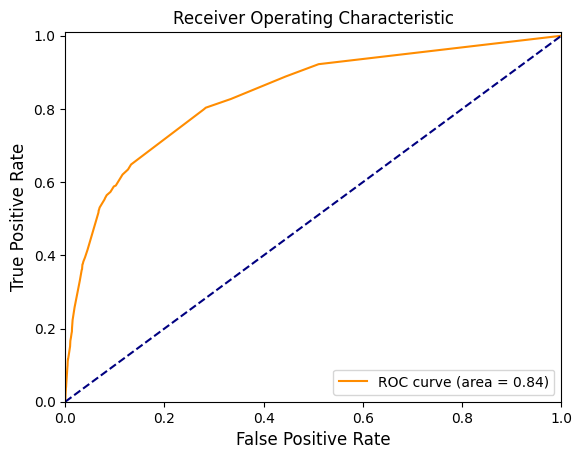

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
predictions = grid_search.best_estimator_.predict_proba(strat_test_set) #me da probabilidades
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(strat_test_y_set, predictions[:, 1]) #la clasificación es binaria, tiene que estar en 0/1
roc_auc = auc(fpr, tpr)                                      # o -1/1
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() #área debajo de la curva nos dice cómo de bueno es el modelo

In [158]:
grid_search.predict_proba(strat_test_set)[:,1]

array([0.011193  , 0.03205256, 0.011193  , ..., 0.07185886, 0.011193  ,
       0.07185886])

In [ ]:
# Pensar en el accuracy/recall/precision de los siguientes "arboles"
# Imaginad estos tres árboles de profundida 1. EL primer elemento son los 1s, el segundo los 0s
# ejemplo1hoja1 = [22, 10] Esta hoja predice que los 32 (22 + 10) serán 1s porque hay más 1s (22) que 0s (10)
# ejemplo1hoja2 =  [33, 93] Esta hoja precido que los 126 (33+93) serán 0s porque hay más 0s (93) que 0s (33)

In [ ]:
# Imaginad ahora 200 elementos, 47 positivos y 153 negativos

In [183]:
# Qué predice cada hoja. 
# Calcula accuracy, precision, recall
arbol1hoja1 = [15, 10] # 1
arbol1hoja2 =  [32, 143] # 0
acc = (15 + 143)/(15+10+32+143)
print(acc)
pre = 15/(15 + 10)
print(pre)
rec = 15/(15+32)
print(rec)


0.79
0.6
0.3191489361702128


In [186]:
# Qué predice cada hoja. 
# Calcula accuracy, precision, recall
arbol2hoja1 = [30, 25] #1
arbol2hoja2 =  [17, 128] #0
acc = (30 + 128)/(30+25+17+128)
print(acc)
pre = 30/(30+25)
print(pre)
rec = 30/(30+17)
print(rec)

0.79
0.5454545454545454
0.6382978723404256


In [189]:
# Qué predice cada hoja. 
# Calcula accuracy, precision, recall
arbol3hoja1 = [47, 42]
arbol3hoja2 =  [0, 111]
acc = (47+111)/(47+42+0+111)
print(acc)
pre = 47/(47+42)
print(pre)
rec = 47/(47+0)
print(rec)

0.79
0.5280898876404494
1.0


In [191]:
# Qué predice cada hoja. 
# Calcula accuracy, precision, recall
arbol4hoja1 = [5, 0]
arbol4hoja2 =  [42, 153]
acc = (5+153)/(5+0+42+153)
print(acc)
pre = 5/(5+0)
print(pre)
rec = 5/(5+42)
print(rec)


0.79
1.0
0.10638297872340426


In [192]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
5,0.047661,73,0,0.007664,3000.0,4,0,0,0,0.0


In [202]:
from sklearn.model_selection import GridSearchCV
tree_rd = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': range(2,13),
    'min_samples_leaf': range(1,31)
}

grid_search = GridSearchCV(tree_rd, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   cv=5, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

grid_search.fit(strat_train_set, strat_train_y_set)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 13),
                         'min_samples_leaf': range(1, 31)},
             scoring='accuracy')

In [204]:
print(accuracy_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(precision_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(recall_score(strat_train_y_set, grid_search.predict(strat_train_set)))

0.9374893580793462
0.671562082777036
0.1574827802128992


In [205]:
from sklearn.model_selection import GridSearchCV
tree_rd = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': range(2,13),
    'min_samples_leaf': range(1,31)
}

grid_search = GridSearchCV(tree_rd, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   cv=5, # Folds del cross validation
                                   scoring="precision", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

grid_search.fit(strat_train_set, strat_train_y_set)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 13),
                         'min_samples_leaf': range(1, 31)},
             scoring='precision')

In [206]:
print(accuracy_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(precision_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(recall_score(strat_train_y_set, grid_search.predict(strat_train_set)))

0.9352119870594244
0.6616379310344828
0.09611772072636193


In [207]:
from sklearn.model_selection import GridSearchCV
tree_rd = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': range(2,13),
    'min_samples_leaf': range(1,31)
}

grid_search = GridSearchCV(tree_rd, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   cv=5, # Folds del cross validation
                                   scoring="recall", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

grid_search.fit(strat_train_set, strat_train_y_set)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 13),
                         'min_samples_leaf': range(1, 31)},
             scoring='recall')

In [209]:
print(accuracy_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(precision_score(strat_train_y_set, grid_search.predict(strat_train_set)))
print(recall_score(strat_train_y_set, grid_search.predict(strat_train_set)))

0.9548782564277201
0.8846704871060171
0.38666249217282406


# Refactorizar código